In [1]:
# Import PyTorch
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [3]:
# setup training data
from torchvision import datasets

train_data = datasets.EMNIST(
        root = "data",
        split = "letters",
        train = True,
        download = True,
        transform = torchvision.transforms.Compose([
            lambda img : torchvision.transforms.functional.rotate(img,-90),
            lambda img : torchvision.transforms.functional.hflip(img),
            torchvision.transforms.ToTensor()
        ]),
        target_transform = None)


In [4]:
# setup testing datasets
test_data = datasets.EMNIST(
        root = "data",
        split = "letters",
        train = False,
        download = True,
        transform = torchvision.transforms.Compose([
            lambda img : torchvision.transforms.functional.rotate(img,-90),
            lambda img : torchvision.transforms.functional.hflip(img),
            torchvision.transforms.ToTensor()
        ]),
        target_transform = None)

In [5]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx

class_names , class_to_idx

(['N/A',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 {'N/A': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26})

# CNN Model Class

In [6]:
# Create a concolutional neural network 

class CNNModel(nn.Module):

    def __init__( self, input_shape:int,hidden_units:int,output_shape:int):
        
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape ,
                      out_channels = hidden_units,
                      kernel_size = 3 ,
                      stride=1 ,
                      padding = 1) ,
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units ,
                      out_channels = hidden_units,
                      kernel_size = 3 ,
                      stride=1 ,
                      padding = 1) ,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
            
        ) # values we can set ourselves in our NN's are called hyperparameters 
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units ,
                      out_channels = hidden_units,
                      kernel_size = 3 ,
                      stride=1 ,
                      padding = 1) ,
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units ,
                      out_channels = hidden_units,
                      kernel_size = 3 ,
                      stride=1 ,
                      padding = 1) ,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
            
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, #trick to calculate this
                     out_features=output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
#         print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
        return x

In [7]:
MODEL = CNNModel(input_shape = 1,  #color units 
                   hidden_units = 27,
                   output_shape = len(class_names)
                  )



In [8]:
PATH = 'models/CNN_model_letter_detection.pth'
MODEL.load_state_dict(torch.load(PATH))
MODEL.eval()

CNNModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(27, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(27, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(27, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1323, out_features=27, bias=True)
  )
)

In [9]:
MODEL.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0510, -0.4780, -0.2205],
                        [ 0.2720,  0.4567, -0.2176],
                        [ 0.1291,  0.2866,  0.2234]]],
              
              
                      [[[-0.4674,  0.0532, -0.4526],
                        [ 0.1785, -0.1914,  0.3202],
                        [ 0.1583,  0.0125,  0.3782]]],
              
              
                      [[[ 0.0419,  0.2771,  0.3087],
                        [-0.2605,  0.3942,  0.2044],
                        [-0.1431, -0.1385, -0.0818]]],
              
              
                      [[[ 0.2784, -0.0215,  0.1036],
                        [ 0.0299,  0.0115,  0.1466],
                        [-0.3598, -0.3123,  0.1271]]],
              
              
                      [[[-0.2018, -0.1475,  0.3232],
                        [ 0.2246, -0.3407, -0.0368],
                        [ 0.0980,  0.0258, -0.1484]]],
              
              
      

In [10]:
import cv2
import matplotlib.pyplot as plt


image_url = "image_for_practice_.jpg"


def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if(len(im_data.shape)==2):
        height , width = im_data.shape
    else:
        height , width , depth = im_data.shape
    
    # what size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes up the ull figure 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data , cmap="gray")
    plt.show()

def create_bounding_boxes(image_url):
    ''' return: array of img_url string created by bounding boxes... '''
    
    img_obj_list = []
    
    image = cv2.imread(image_url)
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     print("gray")
#     cv2.imwrite("bbox_gray.jpg",gray)
#     display("bbox_gray.jpg")
    blur = cv2.GaussianBlur(gray,(7,7),0)        #object,size of blurring,
#     print("blur")
#     cv2.imwrite("bbox_blur.jpg",blur)
#     display("bbox_blur.jpg")
    thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]       # blurr object , range ,
#     print("thresh")
#     cv2.imwrite("bbox_thresh.jpg",thresh)
#     display("bbox_thresh.jpg")
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
    
    dilate = cv2.dilate(thresh, kernel , iterations=1)
#     print("dilate")
#     cv2.imwrite("bbox_dilate.jpg",dilate)
#     display("bbox_dilate.jpg")
#     cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts)==2 else cnts[1]
    
    cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])
    i=1
    word_bounding_boxes = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if h<30:
            cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),1)
            word_bounding_boxes.append((x,y,w,h))
            
            # Crop the region from the image
            cropped_image = image[y:y+h, x:x+w]           
            
#             print(f"bbox{i}")
            
            
            # Save the cropped image
            cv2.imwrite(f'words/cropped_image{i}.jpg', cropped_image)
#             display(f'words/cropped_image{i}.jpg')
            
            img_obj_list.append(str(f'words/cropped_image{i}.jpg'))
            
            i+=1
            
            
            
    return img_obj_list

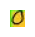

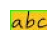

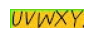

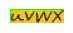

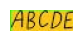

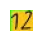

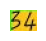

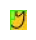

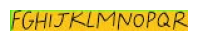

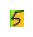

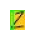

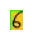

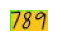

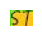

In [11]:
bbox = create_bounding_boxes(image_url = "image_for_practice_.jpg")
for img_url in bbox:
    display(img_url)

# preprocessing image 

# For detecting letters from word

In [12]:
import cv2
import math




img_url = 'cropped_image5.jpg'

# img = cv2.imread(img_url , cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_url)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

x , y = thresh.shape

##################### Image Refactoring ###################
x_new = 28
y_new = math.ceil((x_new/x) * y)
###########################################################
resized_image = cv2.resize(thresh, (y_new,x_new))
resized_image
cv2.imwrite('resized_c5.jpg',resized_image)

display('resized_c5.jpg')

type(img),img.shape,type(resized_image),resized_image.shape

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def words_to_text(img_url:str):
    
    text = ""
    
    img = cv2.imread(img_url)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    x , y = thresh.shape
    
    ##################### Image Refactoring ###################
    x_new = 28
    y_new = math.ceil((x_new/x) * y)
    ###########################################################
    resized_image = cv2.resize(thresh, (y_new,x_new))
    
    
    cnts = cv2.findContours(resized_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts)==2 else cnts[1]

    cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])
    i=1
    
    word_bounding_boxes = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if h<30:
            cv2.rectangle(resized_image,(x,y),(x+w,y+h),(36,255,12),1)
            word_bounding_boxes.append((x,y,w,h))

            # Crop the region from the image
            cropped_image = resized_image[y:y+h, x:x+w]           

#             print(f"bbox{i}")
            cv2.imwrite(f'i{i}.jpg', cropped_image)
            txt = detect_letter(model=MODEL,img_url=str(f'i{i}.jpg'),class_names=class_names)
        
            text+=txt
            i+=1
    
    print(text)
    
    
words_to_text(img_url='cropped_image5.jpg')   

In [ ]:
cnts = cv2.findContours(resized_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cnts = cnts[0] if len(cnts)==2 else cnts[1]
    
cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])
i=1
word_bounding_boxes = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h<30:
        cv2.rectangle(resized_image,(x,y),(x+w,y+h),(36,255,12),1)
        word_bounding_boxes.append((x,y,w,h))
            
        # Crop the region from the image
        cropped_image = resized_image[y:y+h, x:x+w]           
            
        print(f"bbox{i}")
            
            
        # Save the cropped image
        cv2.imwrite(f'i{i}.jpg', cropped_image)
        display(f'i{i}.jpg')
            
        i+=1
#             cv2.imwrite("bbox_image.jpg",image)
#             display("bbox_image.jpg")

In [ ]:
def detect_letter(model:nn.Module,
                 img_url:str,
                 class_names:list):
    
    '''returns : detected_later in string '''
    
    # Load the thresholded image
    thresh_img = cv2.imread(img_url, cv2.IMREAD_GRAYSCALE)

    # Define the desired size
    desired_size = 28

    # Find the current size
    height, width = thresh_img.shape

    # Calculate border sizes
    border_vertical = (desired_size - height) // 2
    border_horizontal = (desired_size - width) // 2

    # Add borders to the image
    bordered_img = cv2.copyMakeBorder(thresh_img, border_vertical, border_vertical, border_horizontal, border_horizontal, cv2.BORDER_CONSTANT, value=0)

    # Resize the image to desired size
    resized_img = cv2.resize(bordered_img, (desired_size, desired_size))


    #converting numpy to tensor 
    resized_image_tensor = torch.from_numpy(resized_img)

#     type(resized_image_tensor),resized_image_tensor.shape



    sample = resized_image_tensor
    MODEL.eval()
    with torch.inference_mode():
        sample = sample.type(torch.float)
        sample = torch.unsqueeze(sample,dim=0)
        sample = torch.unsqueeze(sample,dim=0)

        pred_logit = MODEL(sample)

        pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

        pred_class = pred_prob.argmax(dim=0)

#         print(class_names[pred_class])
        return str(class_names[pred_class])

In [ ]:
def words_to_text(img_url:str):
    
    '''returns : predict and returns textul word from image .'''
    
    text = ""
    
    img = cv2.imread(img_url)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    x , y = thresh.shape
    
    ##################### Image Refactoring ###################
    x_new = 28
    y_new = math.ceil((x_new/x) * y)
    ###########################################################
    resized_image = cv2.resize(thresh, (y_new,x_new))
    
    
    cnts = cv2.findContours(resized_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts)==2 else cnts[1]

    cnts = sorted(cnts, key=lambda x:cv2.boundingRect(x)[0])
    i=1
    
    word_bounding_boxes = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if h<30:
            cv2.rectangle(resized_image,(x,y),(x+w,y+h),(36,255,12),1)
            word_bounding_boxes.append((x,y,w,h))

            # Crop the region from the image
            cropped_image = resized_image[y:y+h, x:x+w]           

#             print(f"bbox{i}")
            cv2.imwrite(f'i{i}.jpg', cropped_image)
            txt = detect_letter(model=MODEL,img_url=str(f'i{i}.jpg'),class_names=class_names)
        
            text+=txt
            i+=1
    
    print(text)
    return text
    
words_to_text(img_url='cropped_image5.jpg')   

In [ ]:
import cv2
import numpy as np

letter = detect_letter(MODEL,
                 img_url='i5.jpg',
                 class_names=class_names)
print(letter)


# functionizing what we build

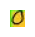

o


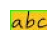

abc


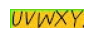

uvwyy


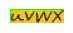

um


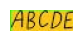

abede


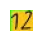

aq


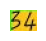

bh


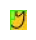

y


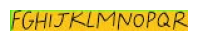

fghijkmpopur


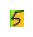

s


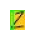

z


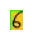

g


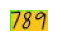

zqg


t


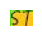

st


In [14]:
import cv2
# import matplotlib.pyplot as plt

import helper_func as HF


image_url = "image_for_practice_.jpg"


bbox = HF.create_bounding_boxes(image_url = image_url)
for img_url in bbox:
    HF.display(img_url)
    
    text = HF.words_to_text(MODEL,img_url,class_names)
    
    print(text)
    
    